In [194]:
import numpy as np
import os
from pprint import pprint as pp

import importlib #importlib.reload(foo)
import helpers as hp
import display as dp
import scripts as sc
import networkx as nx

# IN KAGGLE
in_kaggle = False

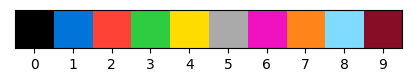

In [2]:
importlib.reload(dp)
data_dir = './data/' if not in_kaggle else '/kaggle/input'
training_path, evaluation_path, test_path = f'{data_dir}training', f'{data_dir}evaluation', f'{data_dir}test'
training_tasks, evaluation_tasks, test_tasks = sorted(os.listdir(training_path)), sorted(os.listdir(evaluation_path)), sorted(os.listdir(test_path))
dp.showTotalColors()

<Figure size 432x288 with 0 Axes>

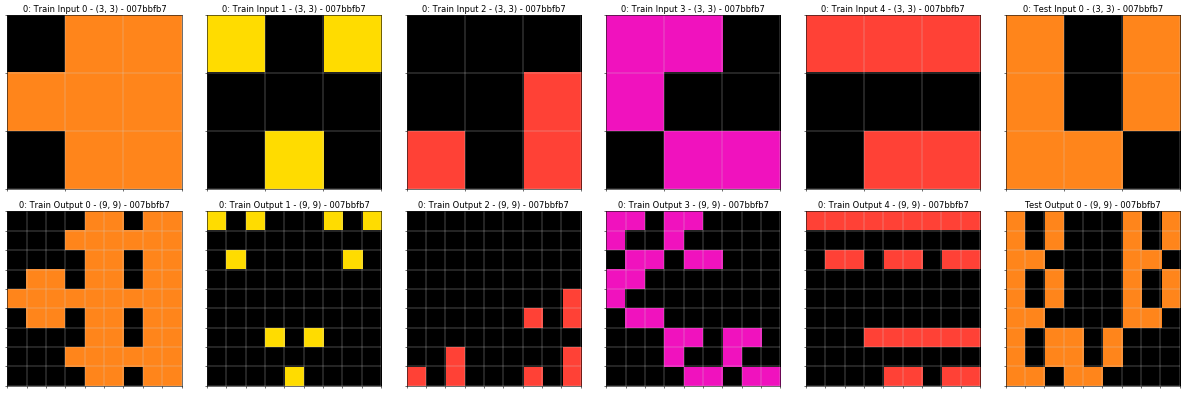

<Figure size 432x288 with 0 Axes>

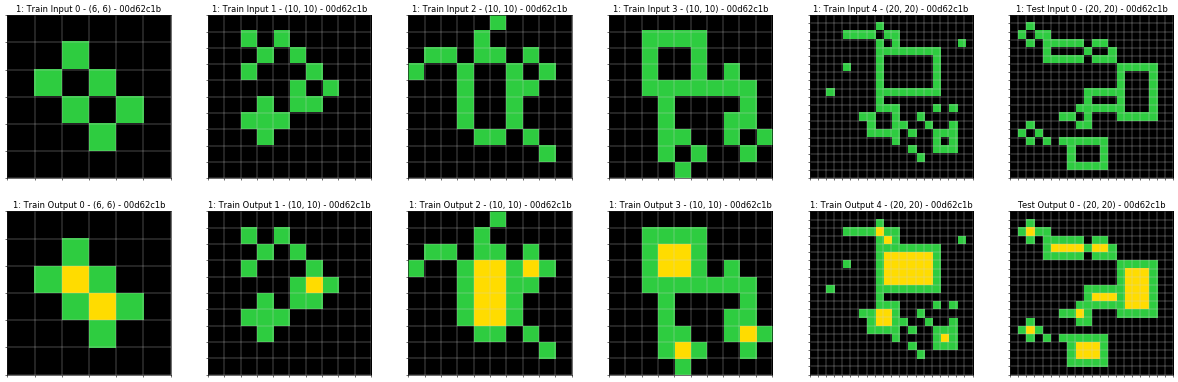

<Figure size 432x288 with 0 Axes>

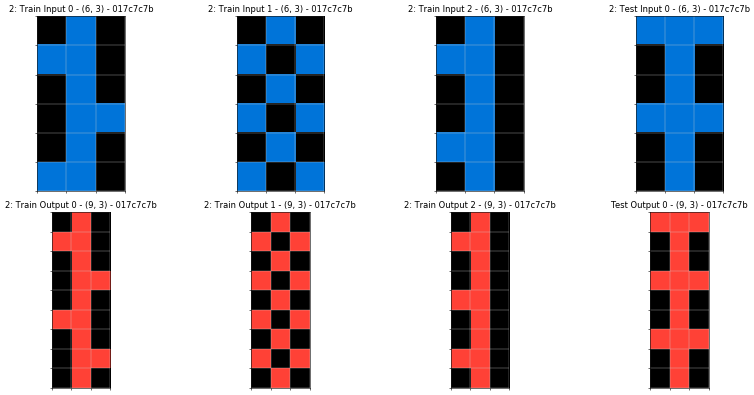

<Figure size 432x288 with 0 Axes>

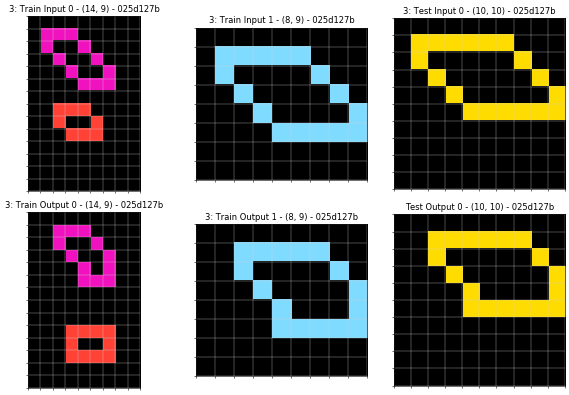

<Figure size 432x288 with 0 Axes>

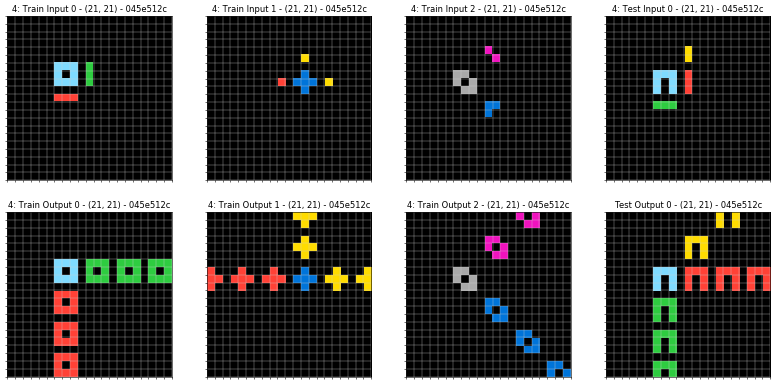

<Figure size 432x288 with 0 Axes>

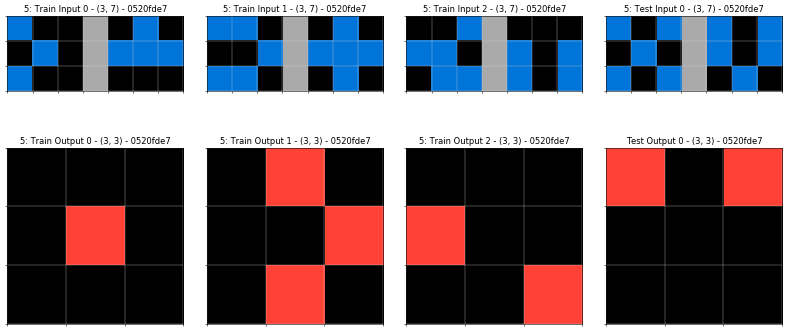

<Figure size 432x288 with 0 Axes>

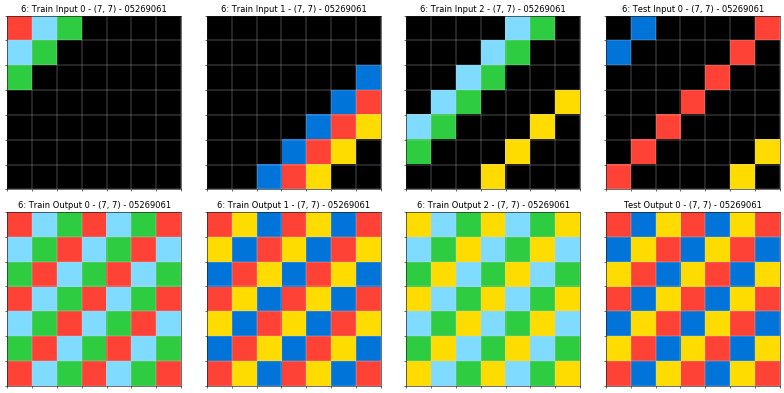

<Figure size 432x288 with 0 Axes>

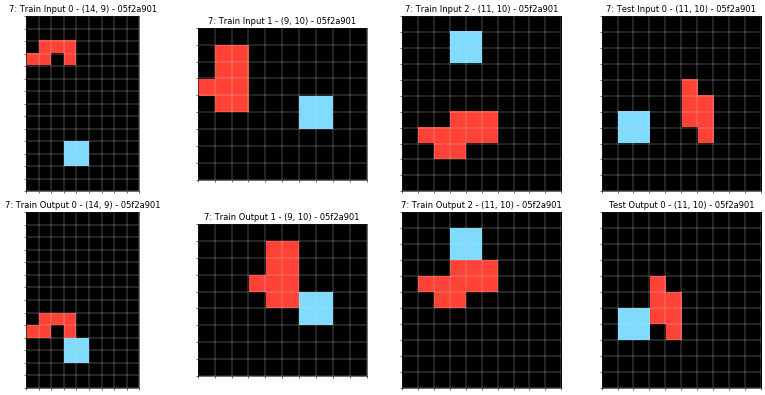

<Figure size 432x288 with 0 Axes>

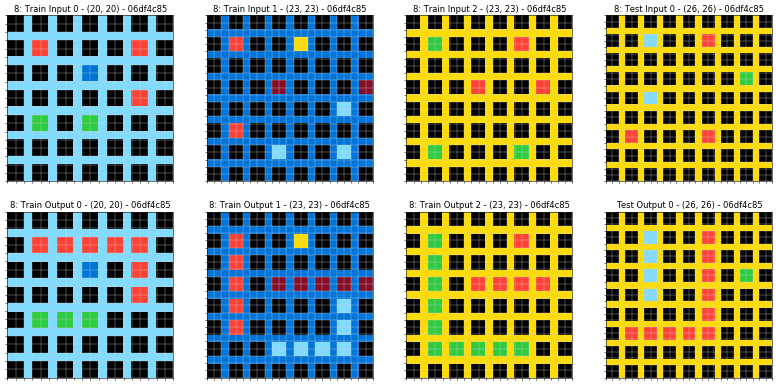

<Figure size 432x288 with 0 Axes>

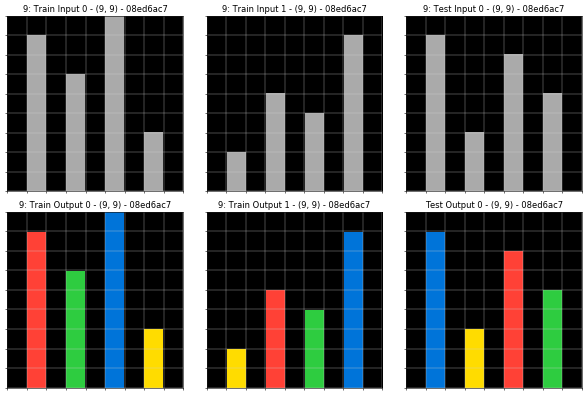

<Figure size 432x288 with 0 Axes>

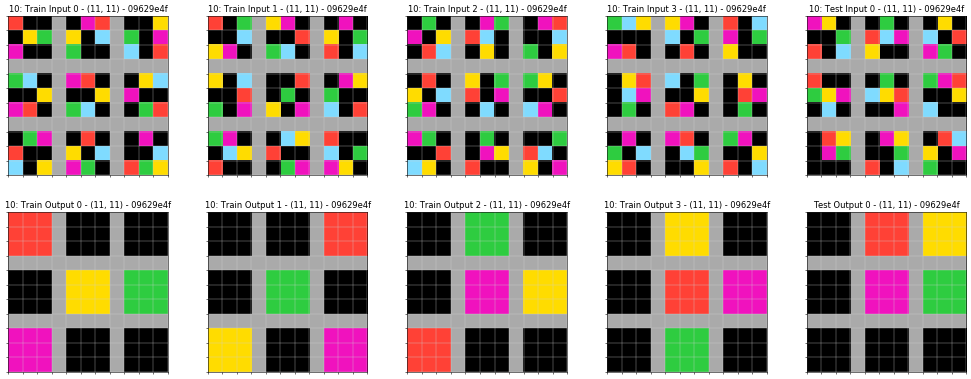

<Figure size 432x288 with 0 Axes>

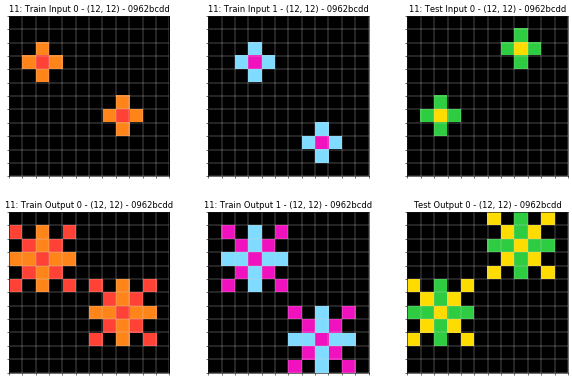

<Figure size 432x288 with 0 Axes>

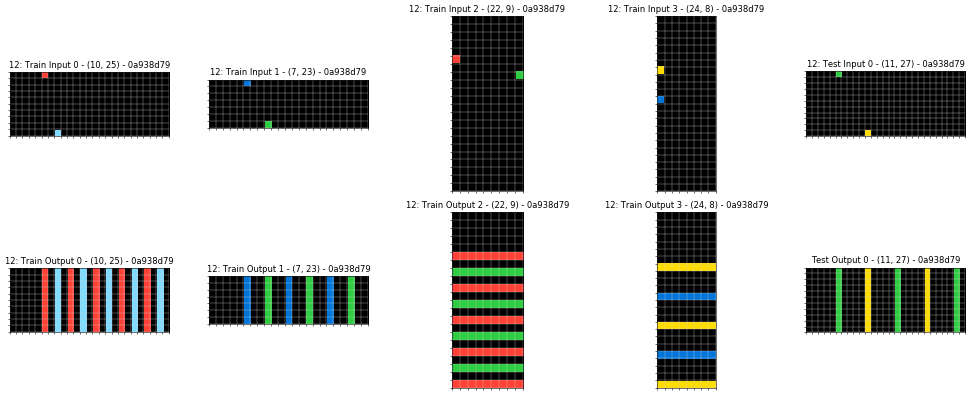

<Figure size 432x288 with 0 Axes>

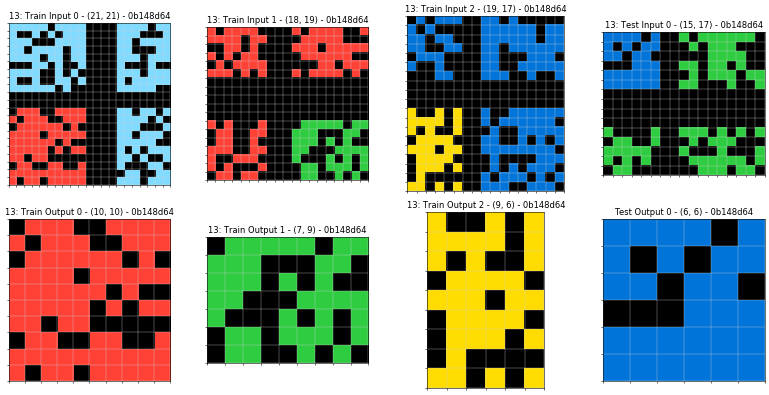

<Figure size 432x288 with 0 Axes>

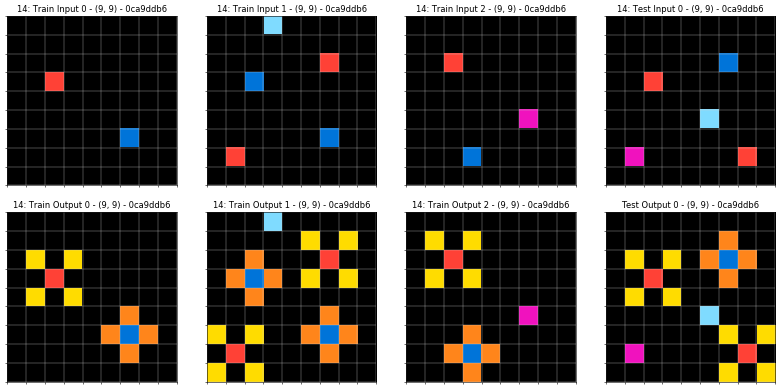

<Figure size 432x288 with 0 Axes>

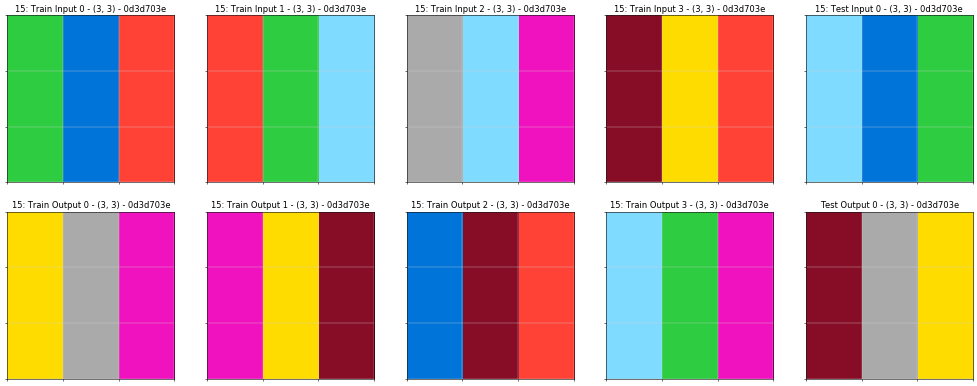

<Figure size 432x288 with 0 Axes>

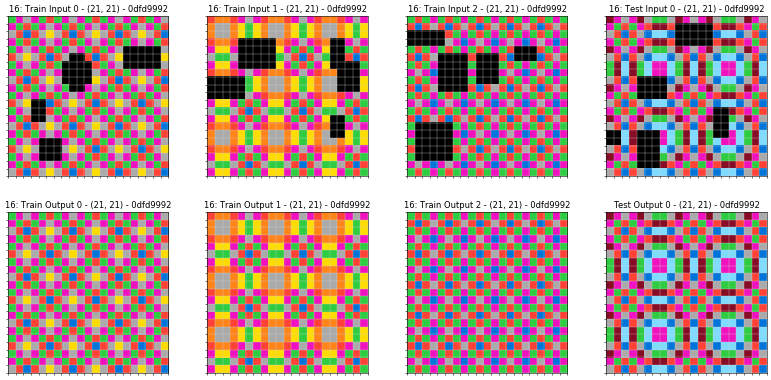

<Figure size 432x288 with 0 Axes>

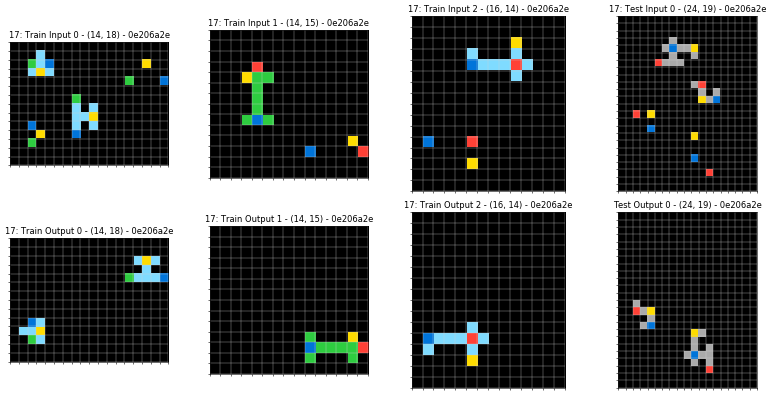

<Figure size 432x288 with 0 Axes>

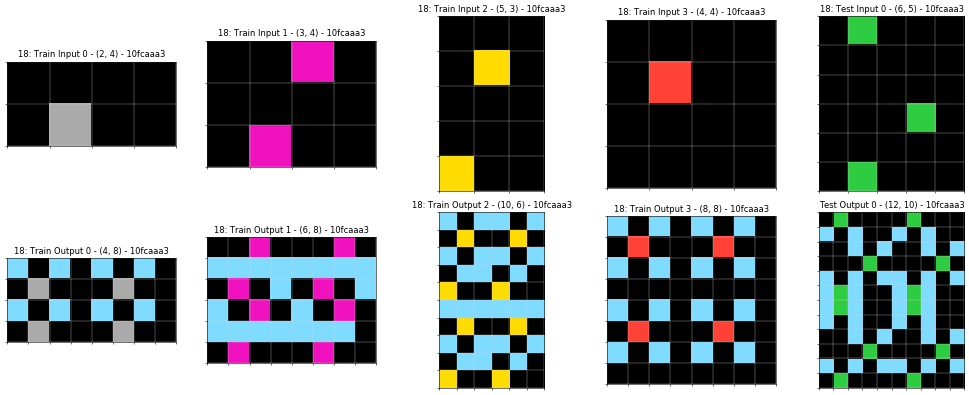

<Figure size 432x288 with 0 Axes>

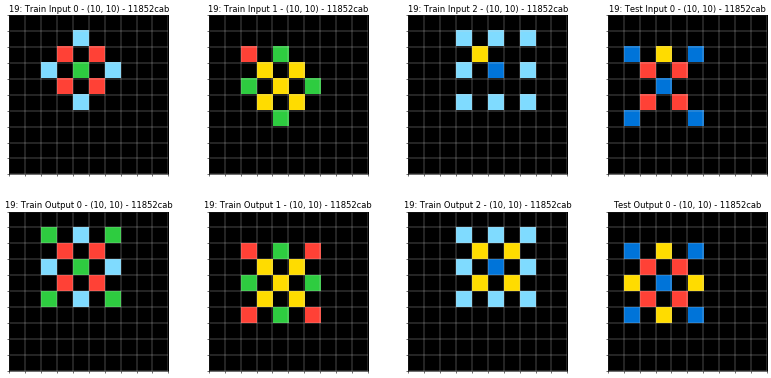

<Figure size 432x288 with 0 Axes>

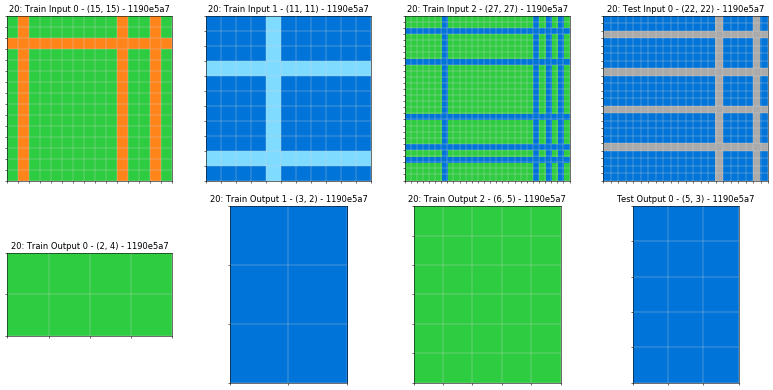

<Figure size 432x288 with 0 Axes>

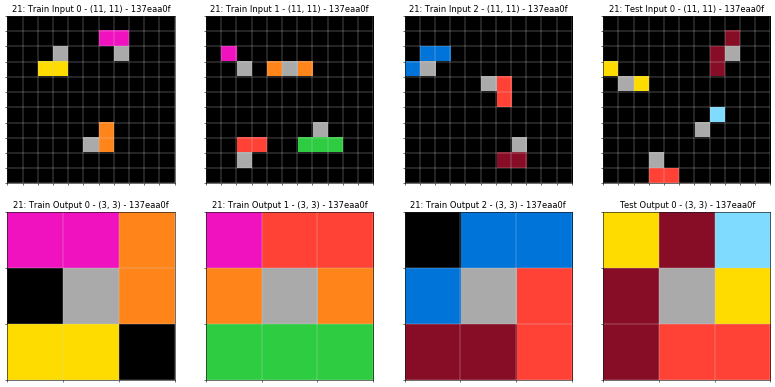

<Figure size 432x288 with 0 Axes>

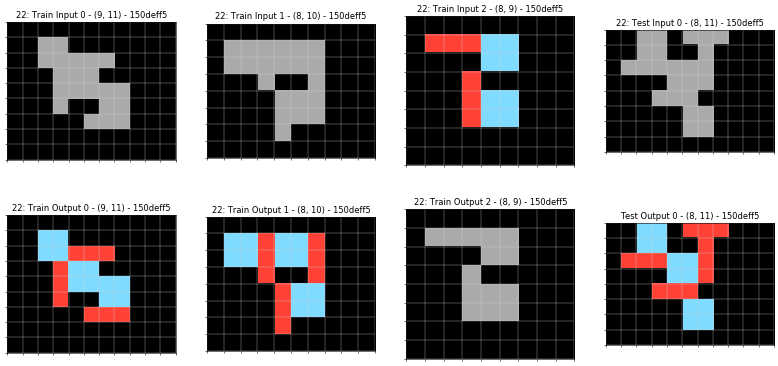

<Figure size 432x288 with 0 Axes>

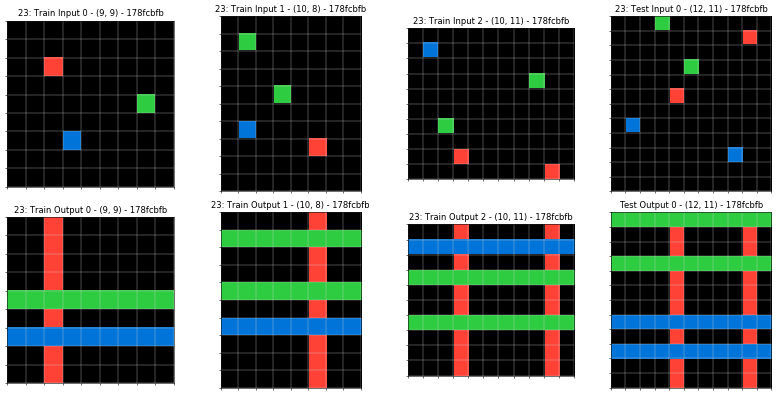

<Figure size 432x288 with 0 Axes>

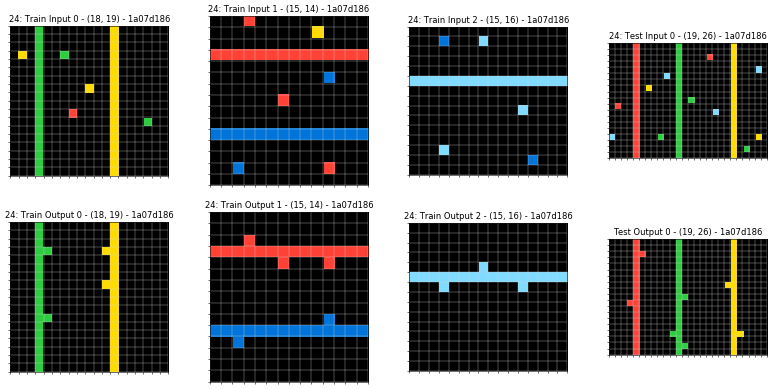

<Figure size 432x288 with 0 Axes>

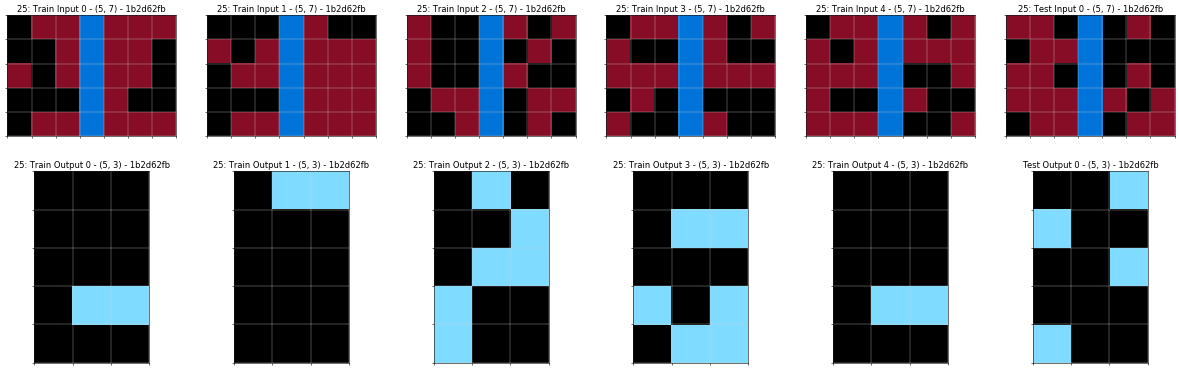

<Figure size 432x288 with 0 Axes>

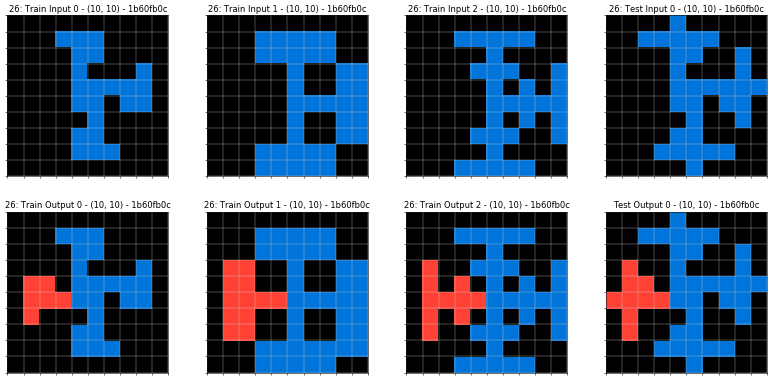

<Figure size 432x288 with 0 Axes>

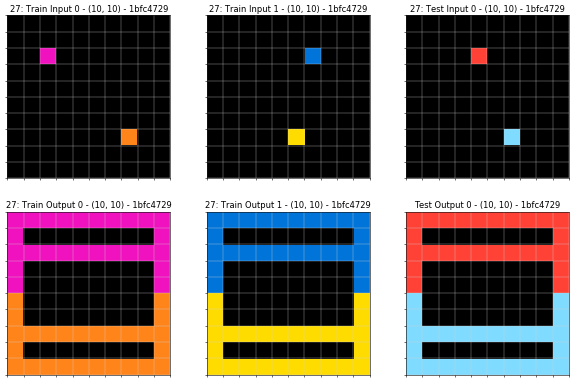

<Figure size 432x288 with 0 Axes>

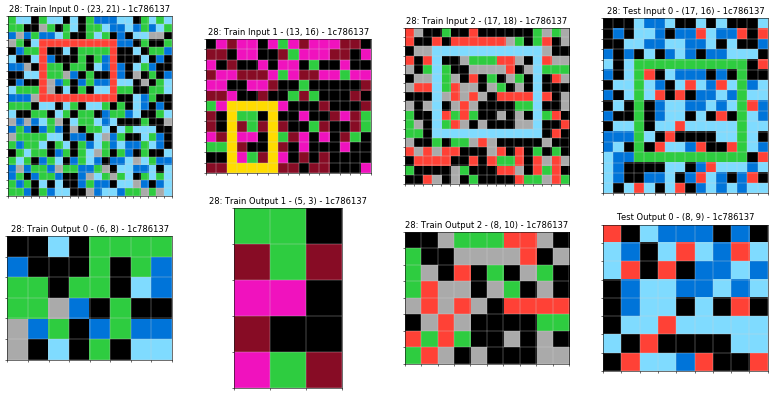

<Figure size 432x288 with 0 Axes>

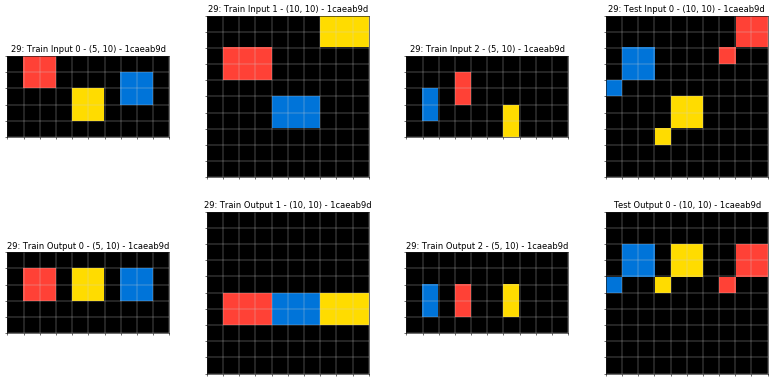

<Figure size 432x288 with 0 Axes>

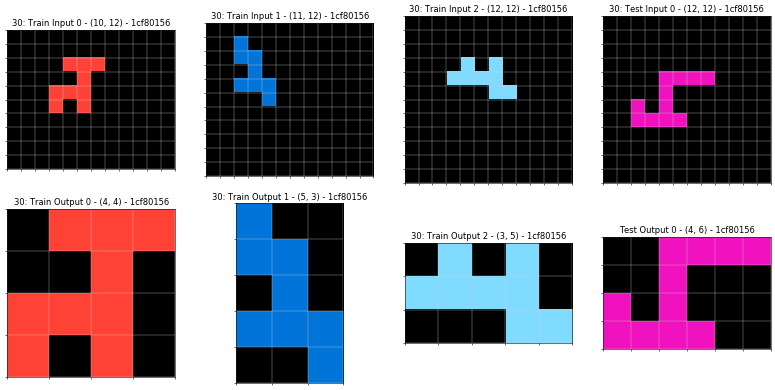

<Figure size 432x288 with 0 Axes>

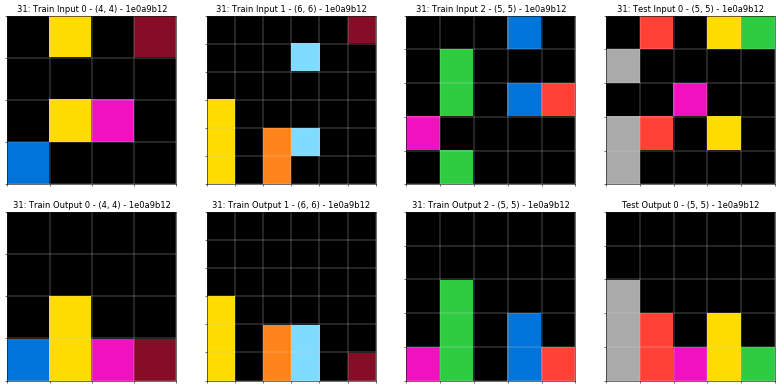

<Figure size 432x288 with 0 Axes>

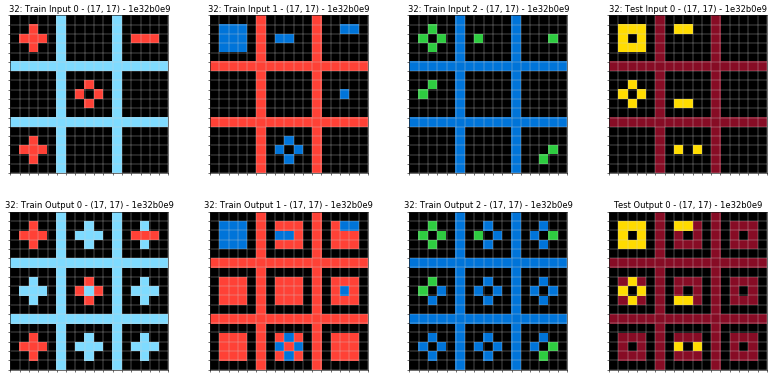

<Figure size 432x288 with 0 Axes>

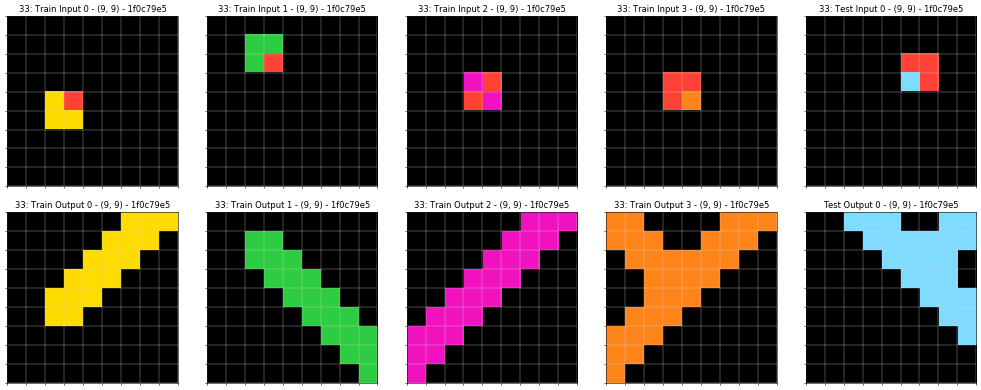

<Figure size 432x288 with 0 Axes>

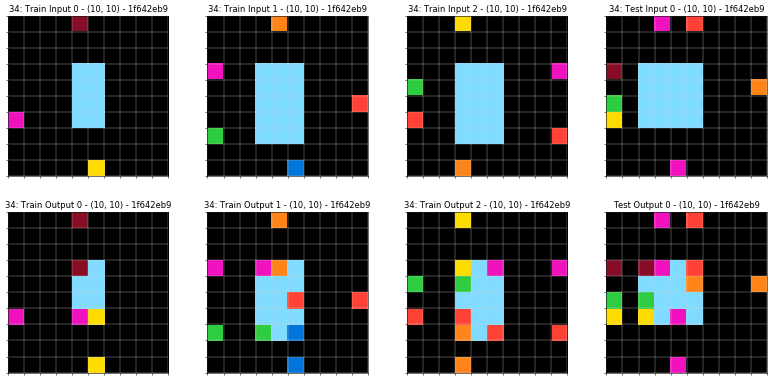

<Figure size 432x288 with 0 Axes>

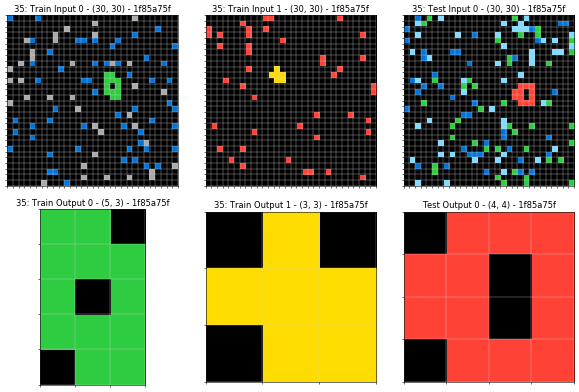

<Figure size 432x288 with 0 Axes>

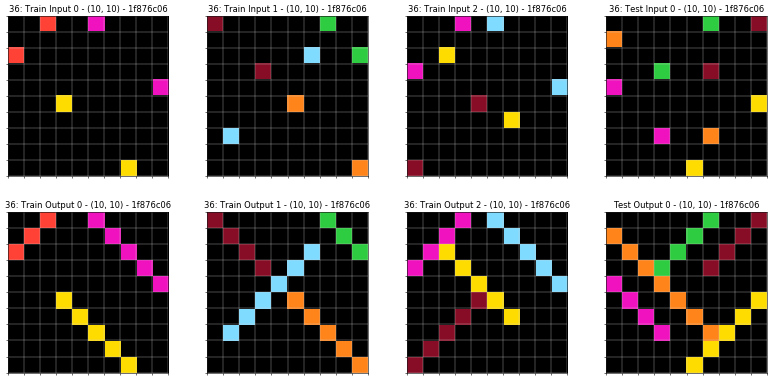

<Figure size 432x288 with 0 Axes>

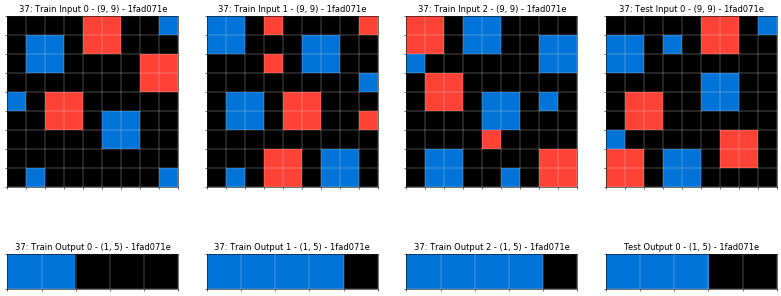

<Figure size 432x288 with 0 Axes>

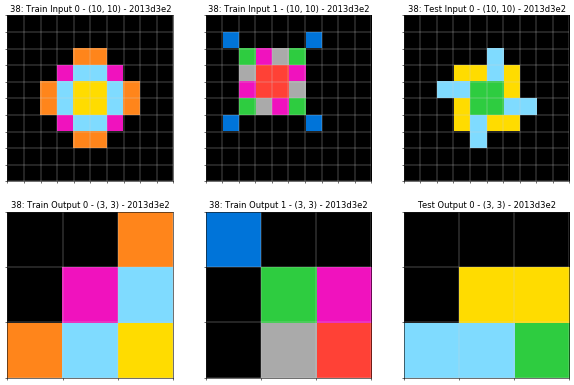

<Figure size 432x288 with 0 Axes>

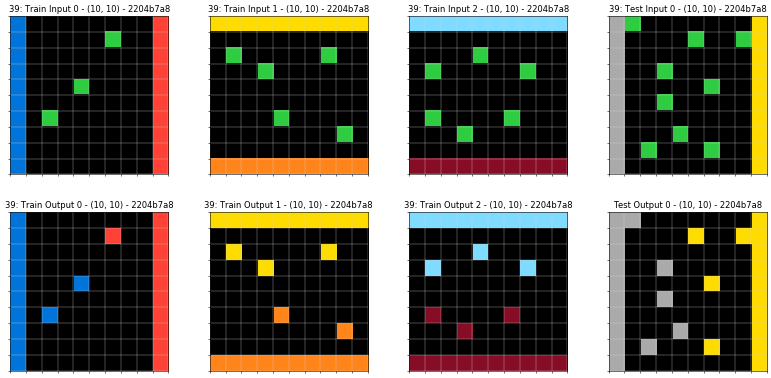

<Figure size 432x288 with 0 Axes>

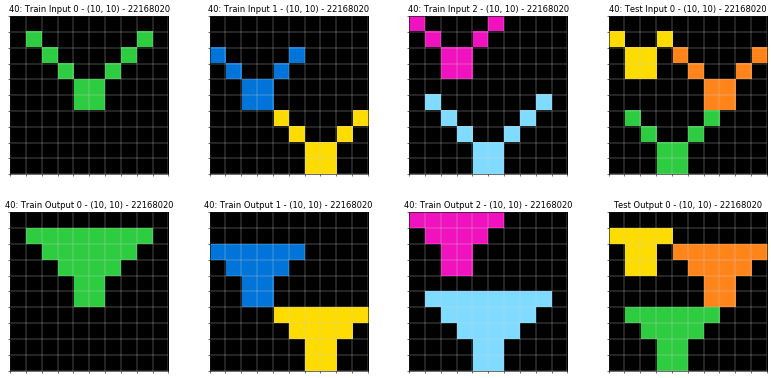

<Figure size 432x288 with 0 Axes>

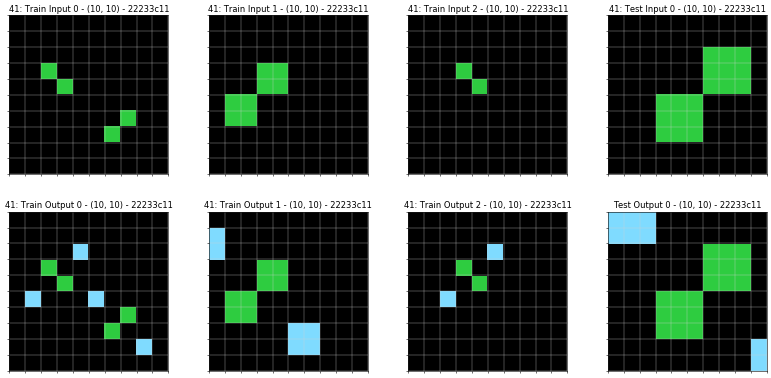

<Figure size 432x288 with 0 Axes>

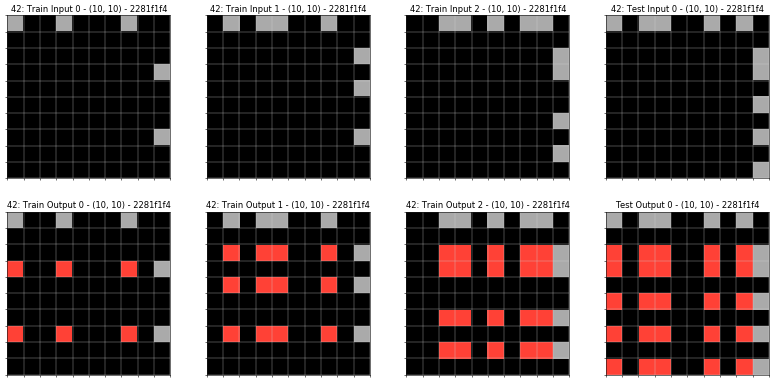

<Figure size 432x288 with 0 Axes>

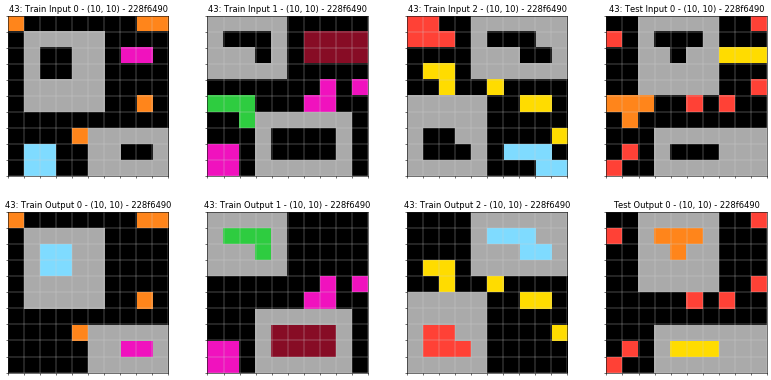

<Figure size 432x288 with 0 Axes>

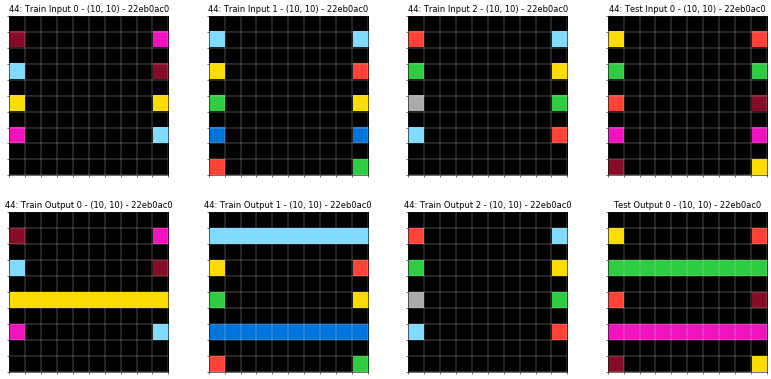

<Figure size 432x288 with 0 Axes>

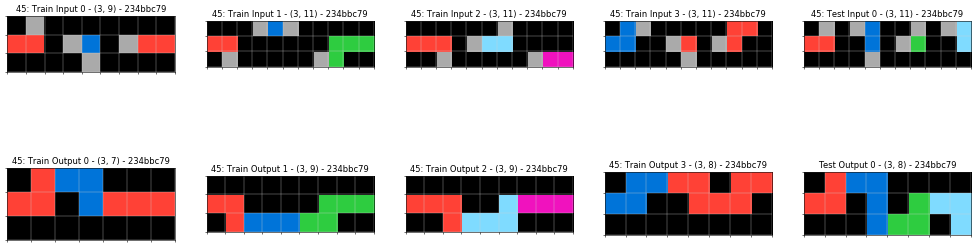

<Figure size 432x288 with 0 Axes>

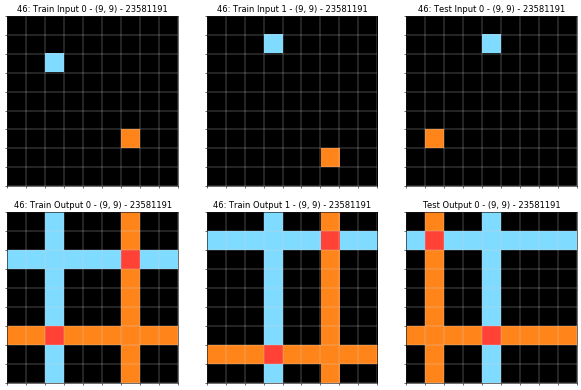

<Figure size 432x288 with 0 Axes>

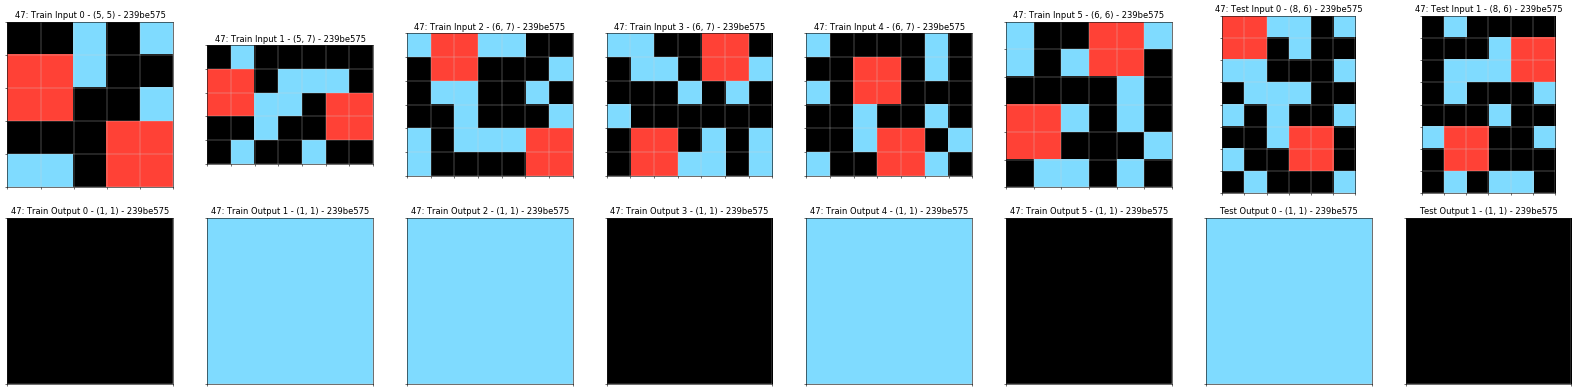

<Figure size 432x288 with 0 Axes>

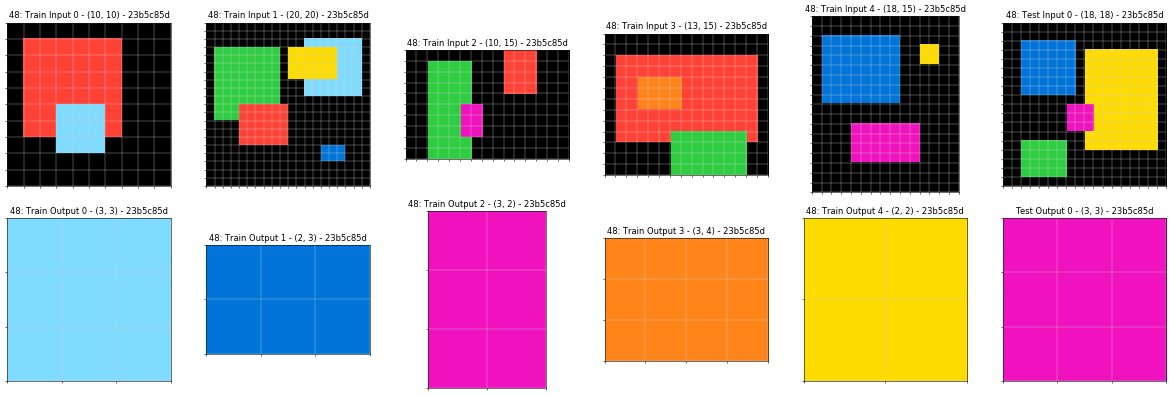

<Figure size 432x288 with 0 Axes>

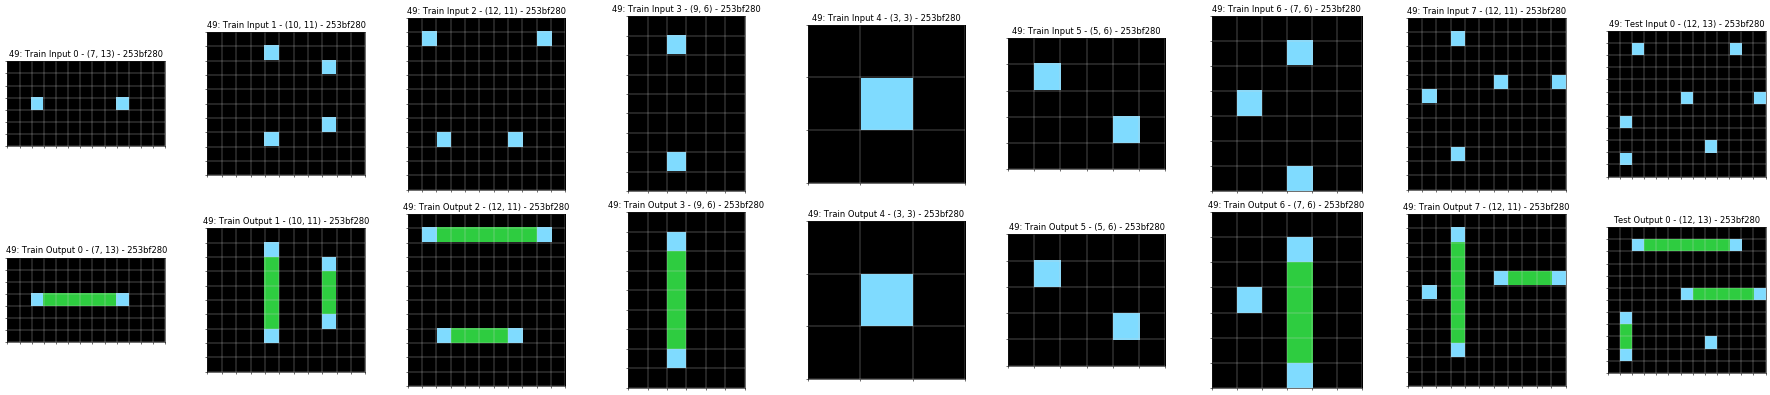

In [190]:
importlib.reload(dp)
importlib.reload(hp)
importlib.reload(sc)
#task_info = hp.getGeneralInfoFromTask(f'{training_path}/007bbfb7.json')

sc.showNTrainingSamples(50, training_tasks, training_path, show=False)
#sc.showNTrainingSamples(2, test_tasks, test_path, test_task=True)
#sc.showNTrainingSamples(2, evaluation_tasks, evaluation_path)

<Figure size 432x288 with 0 Axes>

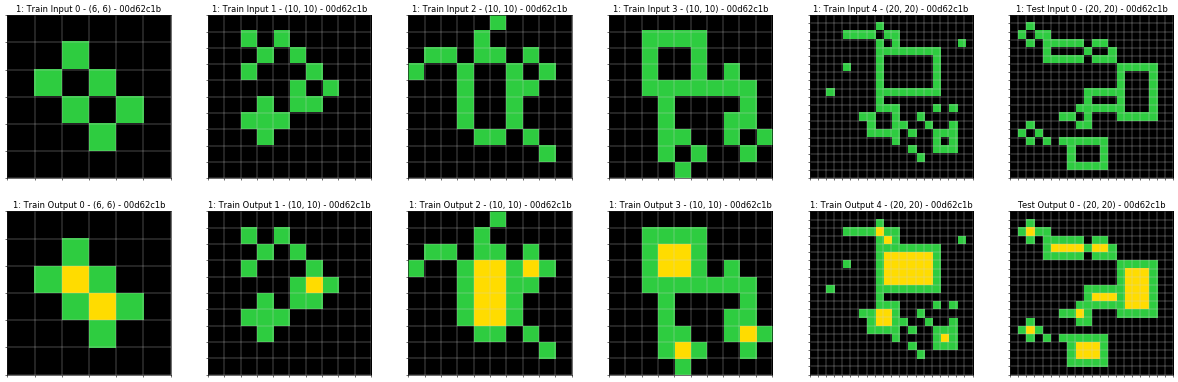

In [185]:
info = hp.getGeneralInfoFromTask(training_path+'/00d62c1b.json')
dp.plot_task(info, 1, '00d62c1b')
#pp(info['train'])

In [189]:
n_colors = 10
shape_col_index, shape_row_index = 1, 0
black, blue, red, green, yellow, gray, magenta, orange, sky, brown = range(n_colors)

def moveMToLeft(m):
  permutation = [ *range(1, m.shape[shape_col_index]), 0]
  return m[:, permutation]

def moveMToRight(m):
  permutation = [ m.shape[shape_col_index] - 1 , *range(0, m.shape[shape_col_index] - 1)]
  return m[:, permutation]

def getMCellInfo(m, c):
  """
  get basic info: coords, shape and copy matrix to simmulate immutablity (not to affect the root matrix, but create copy)
  """
  x_index, y_index = c
  n_rows, n_cols = m.shape
  return x_index, y_index, n_rows, n_cols, np.copy(m)

leftPermutation = lambda m: [ *range(1, m.shape[shape_col_index]), 0]
rightPermutation = lambda m: [ m.shape[shape_col_index] - 1 , *range(0, m.shape[shape_col_index] - 1)]
upwardsPermutation = lambda m: [ *range(1, m.shape[shape_row_index]), 0]
downwardsPermutation = lambda m: [ m.shape[shape_row_index] - 1 , *range(0, m.shape[shape_row_index] - 1)]
  
# --- MODIFYING MATRIX FUNCTIONS ---
def permuteRowToLeft(m, c): #move symetrically row [0, 1, 2] => [1, 2, 0]
  x_index, y_index, n_rows, n_cols, m = getMCellInfo(m, c)
  m[ y_index ] = m[ y_index, leftPermutation(m) ]
  return m, c

def permuteRowToRight(m, c): # move symetrically row [0, 1, 2] => [2, 0, 1]
  x_index, y_index, n_rows, n_cols, m = getMCellInfo(m, c)
  m[ y_index ] = m[ y_index, rightPermutation(m) ]
  return m, c

def permuteColUpwards(m, c): # move symetrically col [[0],[1],[2]] => [[1],[2],[0]]
  x_index, y_index, n_rows, n_cols, m = getMCellInfo(m, c)
  m[:, x_index ] = m[ upwardsPermutation(m), x_index ]
  return m, c

def permuteColDownwards(m, c): # move symetrically col [[0],[1],[2]] => [[1],[2],[0]]
  x_index, y_index, n_rows, n_cols, m = getMCellInfo(m, c)
  m[:, x_index ] = m[ downwardsPermutation(m), x_index ]
  return m, c

# --- MOVING PATTERN FUNCTIONS ---
movePatternToLeft = lambda pattern: pattern[:, leftPermutation(pattern)]
movePatternToRight = lambda pattern: pattern[:, rightPermutation(pattern)]
movePatternUpwards = lambda pattern: pattern[upwardsPermutation(pattern), :]
movePatternDownwards = lambda pattern: pattern[downwardsPermutation(pattern), :]

# needs pattern applied
patternMovement = {
  'movePatternToLeft': movePatternToLeft,
  'movePatternToRight': movePatternToRight,
  'movePatternUpwards': movePatternUpwards,
  'movePatternDownwards': movePatternDownwards,
}

# --- COLOR PATTERN ---
colorPattern = lambda pattern, color: np.where(pattern == black, pattern, color)
# colorAntiPattern = lambda pattern, color: np.where(pattern != black, pattern, black)


In [117]:
def atomicFunctions():
  black, blue, red, green, yellow, gray, magenta, orange, sky, brown = range(10)
  shape_col_index, shape_row_index = 1, 0
  return {
    # move one pixel to the left
    'move_left': moveMToLeft,
    'move_right': {
      'f': moveMToRight,
      'from_analysis':
    }
    # move one pizel to the right
    #'change_matrix_size': lambda m, n: np.,
    #'multiply': 
  }

SyntaxError: invalid syntax (<ipython-input-117-468f45672cab>, line 10)

In [137]:
a = np.matrix([
  [1,2,3, 4],
  [2,3,4, 5],
  [3,4,5, 6],
])

pattern = np.matrix([
  [0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0],
  [0, 3, 0, 3, 0, 0],
  [0, 0, 3, 0, 3, 0],
  [0, 0, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0]
])
output =  [[0, 0, 0, 0, 0, 0],
           [0, 0, 3, 0, 0, 0],
           [0, 3, 4, 3, 0, 0],
           [0, 0, 3, 4, 3, 0],
           [0, 0, 0, 3, 0, 0],
           [0, 0, 0, 0, 0, 0]]


matrix([[0, 0, 0, 0, 0, 0],
        [0, 3, 0, 0, 0, 0],
        [3, 0, 3, 0, 0, 0],
        [0, 3, 0, 3, 0, 0],
        [0, 0, 3, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

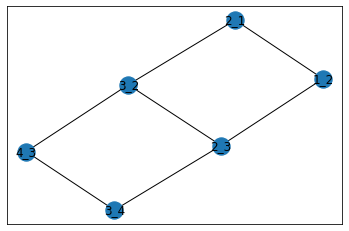

In [310]:
# Get Neighbors for zombie moves according to rules
def getNeigborCellList(i, j, m, condition):
  n = []
  if not condition(m[i, j]): return n
  for i_sub in range(3): # Rows
    for j_sub in range(3): # Cols
      if i_sub == 1 and j_sub == 1: continue 
      ip = i + i_sub - 1
      jp = j + j_sub - 1
      if ip < 0 or jp < 0 or ip == len(m) or jp == len(m[0]) : continue
      #print(ip,jp)
      #print(m[ip, jp])
      if condition(m[ip, jp]):
        #n.append(m[i + i_sub - 1][j + j_sub - 1])
        n.append( (i + i_sub - 1, j + j_sub - 1) )
  return n
  
def toGraph(grid, color):
  G = nx.Graph()
  for lon in range(grid.shape[0]):
    for lat in range(grid.shape[1]):
      #print(lon, lat)
      condition_valid = lambda v: v == color
      neighbor_cells = getNeigborCellList(lon, lat, grid, condition_valid) # just study possible moves
      for n in neighbor_cells:
        #print(n, lon, lat)
        G.add_edge(f'{lon}_{lat}', f'{n[0]}_{n[1]}') #weight = ?
  return G

v = np.matrix([[0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0],
  [0, 3, 4, 3, 0, 0],
  [0, 0, 3, 4, 3, 0],
  [0, 0, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0]])
G = toGraph(v, 3)
nx.draw_networkx(G, with_labels = True)

In [193]:
def extractColorMatrices(m):
  """
  * Assuming continuity in patterns
  """
  m = np.matrix(m)
  for color_n in range(n_colors):
    print(m == color_n)

extractPatterns(inp)

[[ True  True  True  True  True  True]
 [ True  True False  True  True  True]
 [ True False  True False  True  True]
 [ True  True False  True False  True]
 [ True  True  True False  True  True]
 [ True  True  True  True  True  True]]
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
[[False False False False False False]
 [False False  True False False False]
 [False  True False  True False False]
 [False False  True False  True False]
 [False False False  True False False]
 [False False False False False False]]
[[False False False False False False]
 [False False False F

In [188]:
ex = info['train'][0]
inp = ex['input']
out = ex['output']

In [182]:
functions = []
def howToMapInputToOutput(funs, inp, out):
  inp, out = np.matrix(inp), np.matrix(out) 
  
howToMapInputToOutput(functions, inp, out):

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [88]:
b = a[:,[3, 2, 1, 0] ]

In [89]:
b

matrix([[4, 3, 2, 1],
        [5, 4, 3, 2],
        [6, 5, 4, 3]])

In [23]:
a[1] = b

In [66]:
jl, c = permuteColUpwards(a, (1, 1))
jr, c = permuteColDownwards(a, (1, 2))

In [67]:
print(a)
print(jl)
print(jr)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[1 3 3 4]
 [2 4 4 5]
 [3 2 5 6]]
[[1 4 3 4]
 [2 2 4 5]
 [3 3 5 6]]


In [72]:
b = increaseMSize (a, (1,1))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [36]:
perm = np.array(range(len(a-1)))

In [133]:
for task in training_tasks:
  task_info = hp.getGeneralInfoFromTask(f'{training_path}/{task}') 
  for i, t in enumerate(task_info['train']): 
    t_in, t_out = np.array(t["input"]), np.array(t["output"])
    if t_in.shape[0] != t_in.shape[1] and t_out.shape[0] != t_out.shape[1]: 
      print(t_in.shape, t_out.shape)
      print(task)

(6, 3) (9, 3)
017c7c7b.json
(6, 3) (9, 3)
017c7c7b.json
(6, 3) (9, 3)
017c7c7b.json
(14, 9) (14, 9)
025d127b.json
(8, 9) (8, 9)
025d127b.json
(14, 9) (14, 9)
05f2a901.json
(9, 10) (9, 10)
05f2a901.json
(11, 10) (11, 10)
05f2a901.json
(10, 25) (10, 25)
0a938d79.json
(7, 23) (7, 23)
0a938d79.json
(22, 9) (22, 9)
0a938d79.json
(24, 8) (24, 8)
0a938d79.json
(18, 19) (7, 9)
0b148d64.json
(19, 17) (9, 6)
0b148d64.json
(14, 18) (14, 18)
0e206a2e.json
(14, 15) (14, 15)
0e206a2e.json
(16, 14) (16, 14)
0e206a2e.json
(2, 4) (4, 8)
10fcaaa3.json
(3, 4) (6, 8)
10fcaaa3.json
(5, 3) (10, 6)
10fcaaa3.json
(9, 11) (9, 11)
150deff5.json
(8, 10) (8, 10)
150deff5.json
(8, 9) (8, 9)
150deff5.json
(10, 8) (10, 8)
178fcbfb.json
(10, 11) (10, 11)
178fcbfb.json
(18, 19) (18, 19)
1a07d186.json
(15, 14) (15, 14)
1a07d186.json
(15, 16) (15, 16)
1a07d186.json
(5, 7) (5, 3)
1b2d62fb.json
(5, 7) (5, 3)
1b2d62fb.json
(5, 7) (5, 3)
1b2d62fb.json
(5, 7) (5, 3)
1b2d62fb.json
(5, 7) (5, 3)
1b2d62fb.json
(23, 21) (6, 8)
1